Write a clear and concise explanation of the DBSCAN algorithm, covering:
● Cluster Identification: Explain how DBSCAN groups points based on density and identifies noise.
● Key Parameters: Describe the roles of:
○ eps (epsilon): Defi nes the neighborhood radius around a point.
○ min_samples: The minimum number of points required to form a dense region.


● Strengths and Limitations:
○ When does DBSCAN work well? (e.g., detecting arbitrarily shaped clusters, handling noise)
○ When does DBSCAN struggle? (e.g., diffi culty in tuning eps, varying density issues, scalability)

In [1]:
"""Import Libraries"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import Assignment3_DBSCAN as clusterviz
import warnings
warnings.filterwarnings("ignore")


In [2]:
#### Generating the datasets and saving as Dataframe####

# Dataset where DBSCAN excels: Non-spherical clusters with noise    
moons_data = make_moons(n_samples=300, noise=0.05)
moons_data = pd.DataFrame(moons_data[0], columns=['x', 'y'])
# Dataset where DBSCAN struggles: Varying densities
blobs_data = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])
blobs_data = pd.DataFrame(blobs_data[0], columns=['x', 'y'])
# Dataset where DBSCAN struggles: Circular clusters
circles_data = make_circles(n_samples=300, factor=0.5, noise=0.05)
circles_data = pd.DataFrame(circles_data[0], columns=['x', 'y'])

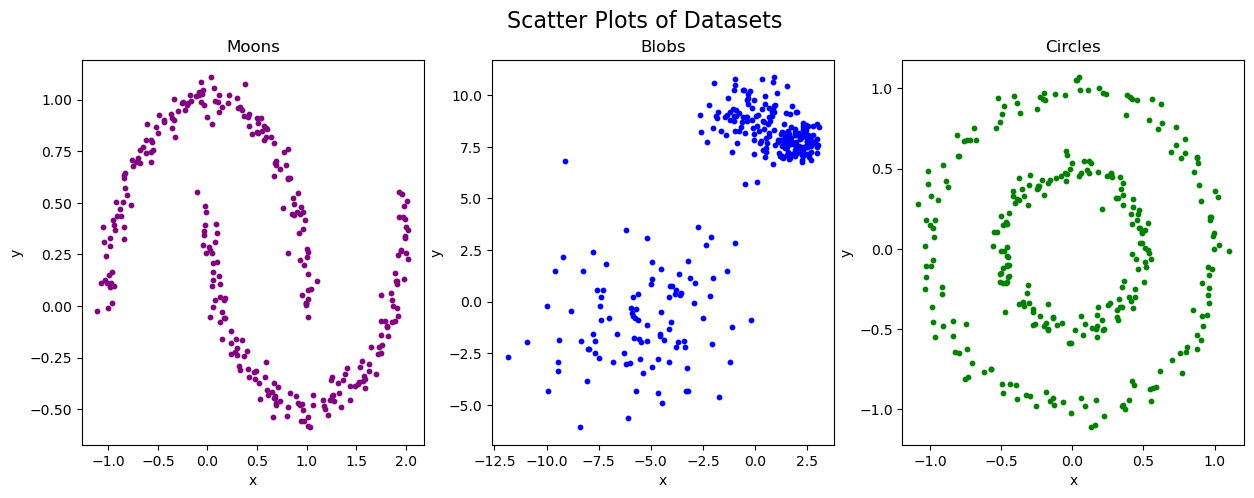

In [3]:
### Visualizing the datasets in  regular scatter plots ###

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].scatter(moons_data["x"], moons_data["y"], s=10, c="purple")
axis[0].set_title("Moons")
axis[0].set_xlabel("x") 
axis[0].set_ylabel("y")

axis[1].scatter(blobs_data["x"], blobs_data["y"], s=10, c="blue")
axis[1].set_title("Blobs")  
axis[1].set_xlabel("x")
axis[1].set_ylabel("y")

axis[2].scatter(circles_data["x"], circles_data["y"], s=10, c="green")
axis[2].set_title("Circles")
axis[2].set_xlabel("x")
axis[2].set_ylabel("y")

figure.suptitle("Scatter Plots of Datasets", fontsize=16)
figure.savefig("datasets_scatter_plots.png", dpi=300, bbox_inches='tight')


plt.show()

In [4]:
#finding the optimal number of clusters using Kmeans, elbow method

#within-cluster sum of squares (WCSS) for KMeans, store in empty list

# X = moons_data["x"]
# Y = moons_data["y"]

# figure, axis = plt.subplots(1,3,figsize=(15, 5))
# wcss = []

# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i,
#                     init = "k-means++",
#                     max_iter = 300,
#                     n_init= 10)
#     kmeans.fit(moons_data)
#     wcss.append(kmeans.inertia_)
# axis[0].plot(range(1, 11), wcss)
# axis[0].set_title("Elbow Method for Optimal K - Moons Dataset")
# axis[0].set_xlabel("Number of clusters")
# axis[0].set_ylabel("WCSS")


# min_samples= range(1, 5)

# all_k_distances = []
# for i in min_samples:
#     neighbors = NearestNeighbors(n_neighbors=i)
#     neighbors_fit = neighbors.fit(moons_data)
#     distances, indices = neighbors_fit.kneighbors(moons_data)
#     k_distances = np.sort(distances[:, i-1])
#     all_k_distances.append(k_distances)


# axis[1].plot(k_distances, label=f'min_samples={i}')
# axis[1].set_title("k-distance plot for different min_samples (moons dataset)")
# axis[1].set_xlabel("Points sorted by distance")
# axis[1].set_ylabel("k-NN distance")
# axis[1].legend()


# agg_clustering = AgglomerativeClustering(n_clusters=2, linkage = 'complete', metric = 'euclidean')
# y_agg = agg_clustering.fit_predict(moons_data)

# axis[2].scatter(X, Y, c=y_agg, cmap='viridis', s=10)
# axis[2].set_title("Agglomerative Clustering - Moons Dataset")
# axis[2].set_xlabel("x")
# axis[2].set_ylabel("y")
# axis[2].legend()




# plt.show()






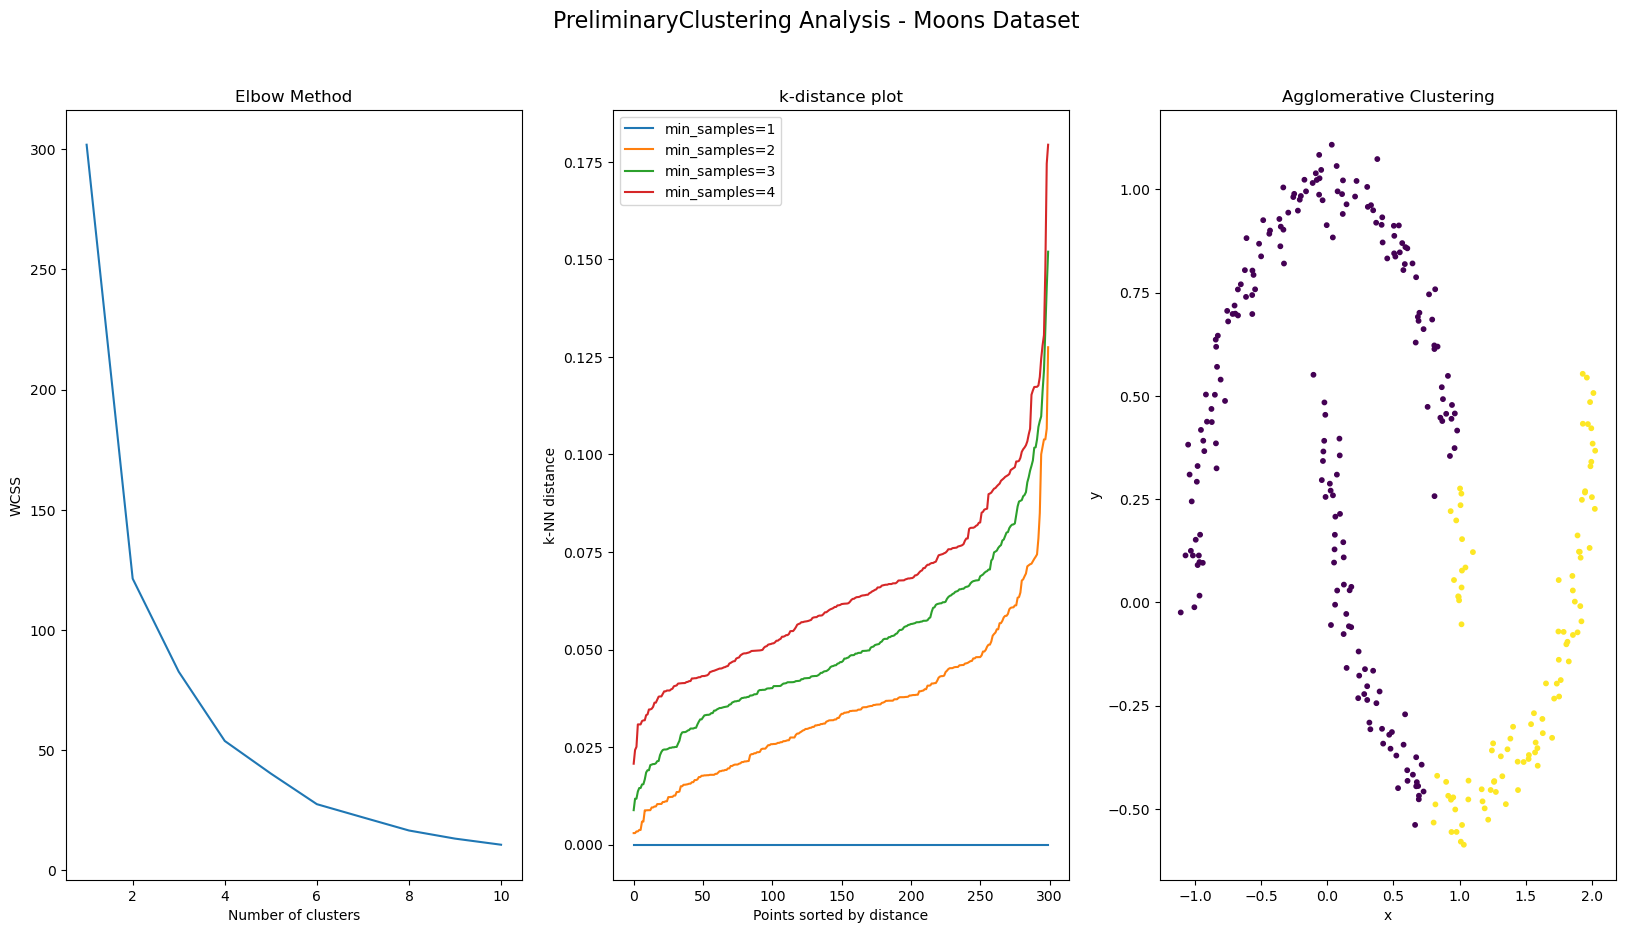

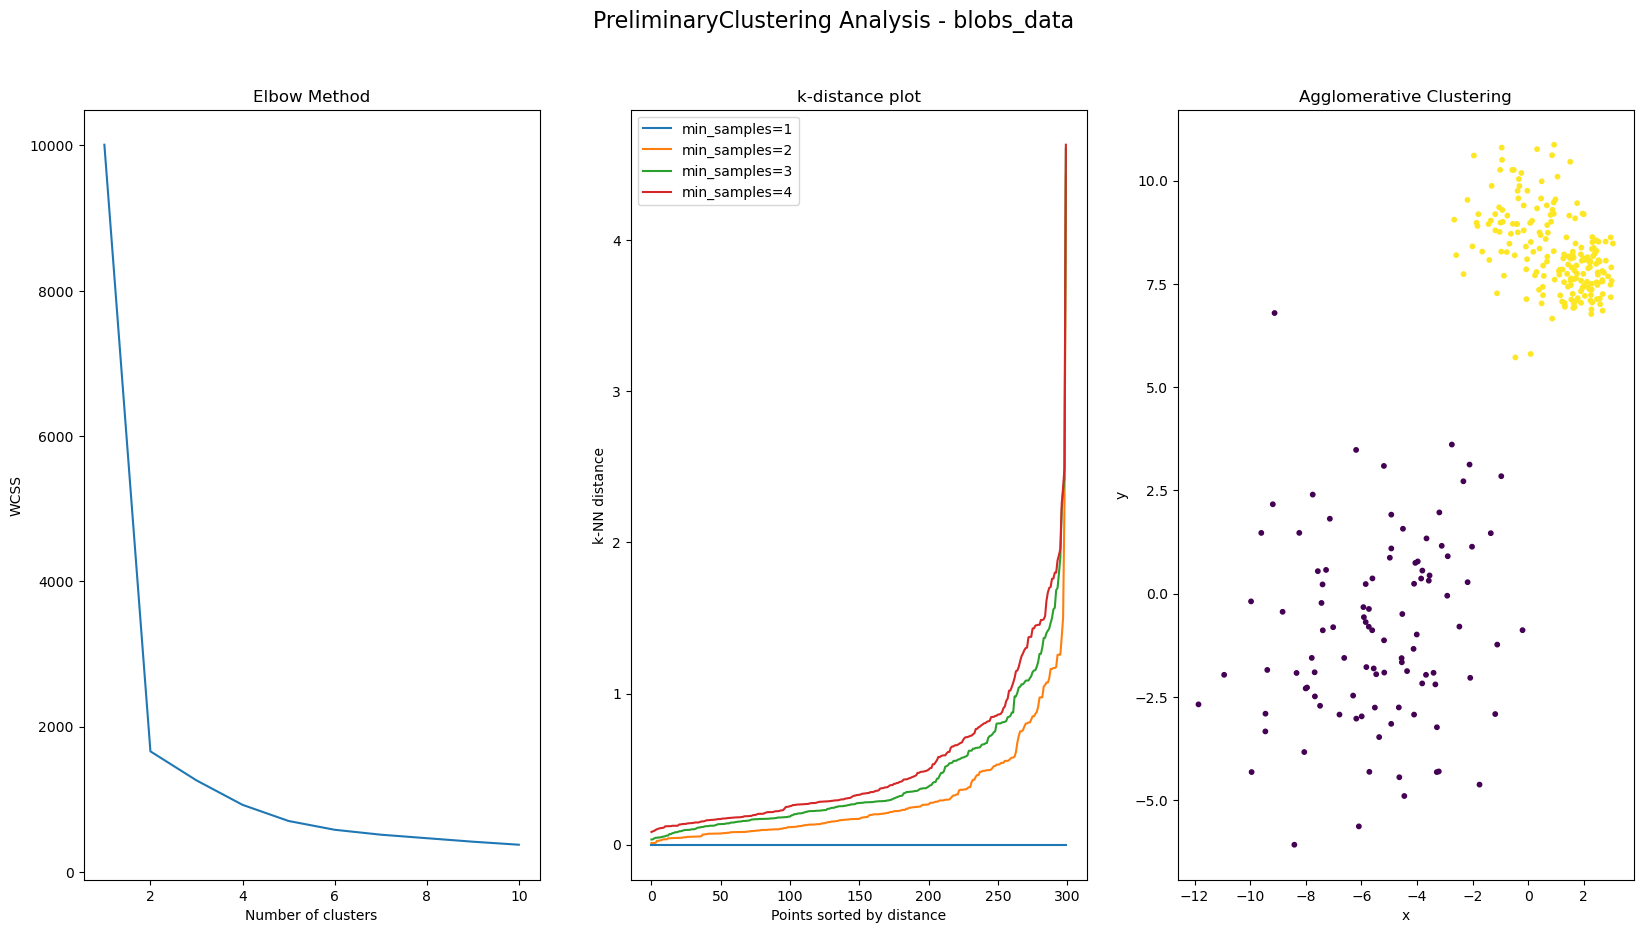

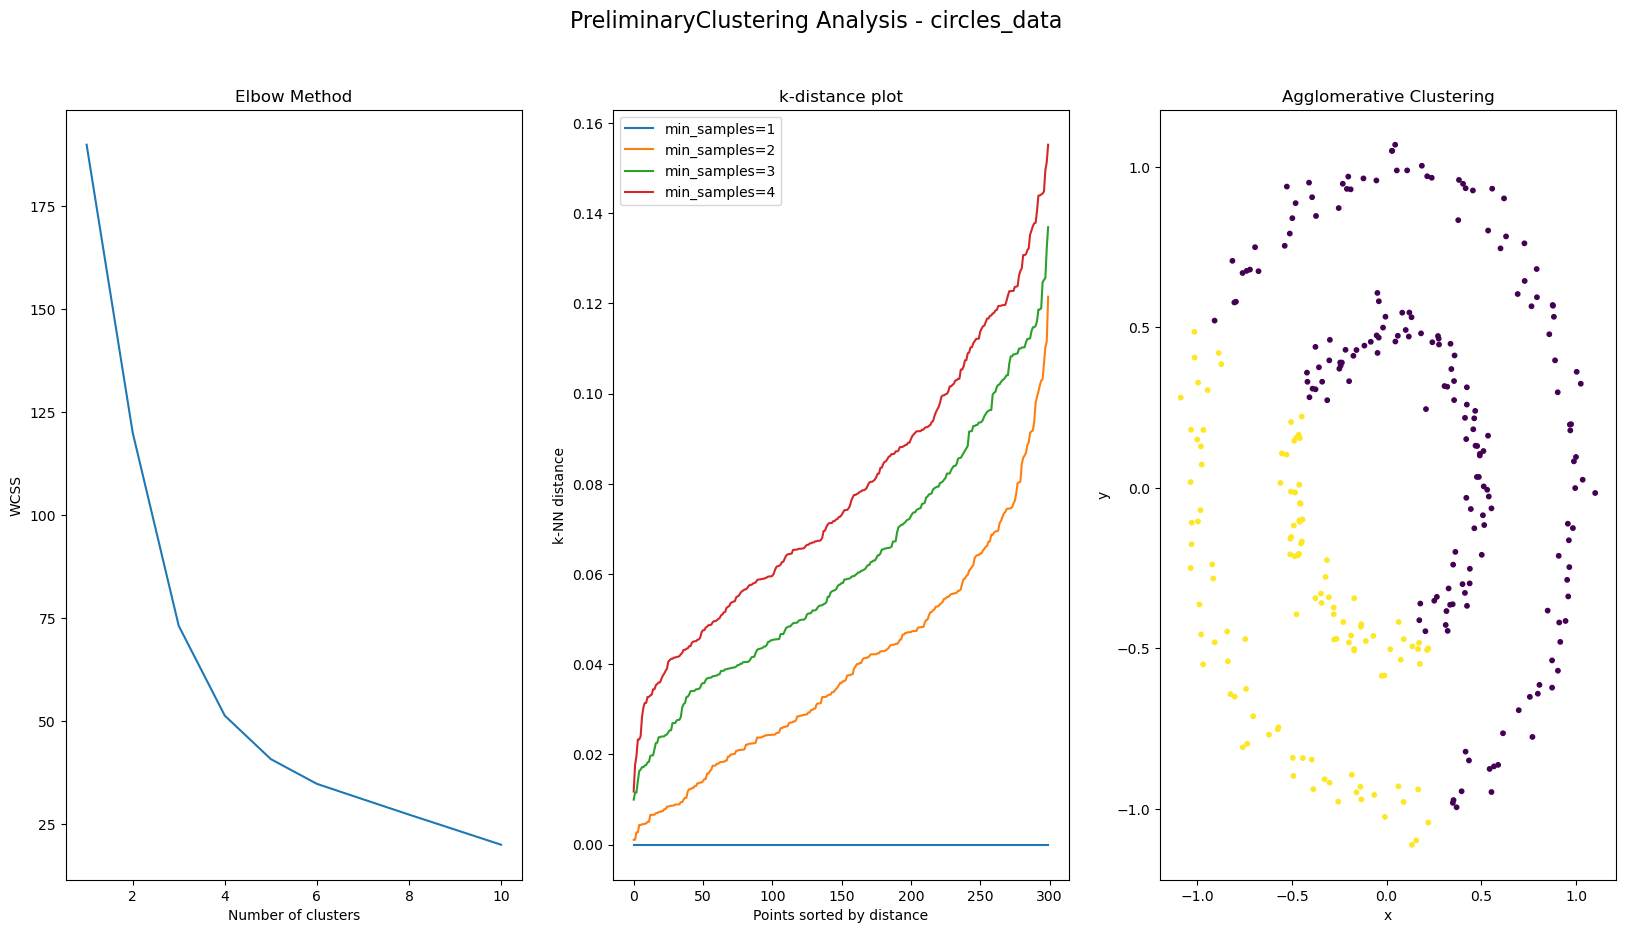

([189.8010099303507,
  120.01997264067833,
  73.16965198109591,
  51.392192412702414,
  40.85297426102951,
  34.85342226100197,
  31.12017175725431,
  27.39848805091338,
  23.754792489345633,
  20.094003716816573],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.

In [6]:
%matplotlib inline
import Assignment3_DBSCAN as clusterviz
clusterviz.parameter_optimize(moons_data,min_samples_range=range(1, 5),n_clusters_range=range(1, 11))
clusterviz.parameter_optimize(blobs_data,dataname="blobs_data",min_samples_range=range(1, 5),n_clusters_range=range(1, 11))
clusterviz.parameter_optimize(circles_data,dataname="circles_data",min_samples_range=range(1, 5),n_clusters_range=range(1, 11))

[-1  0  1]


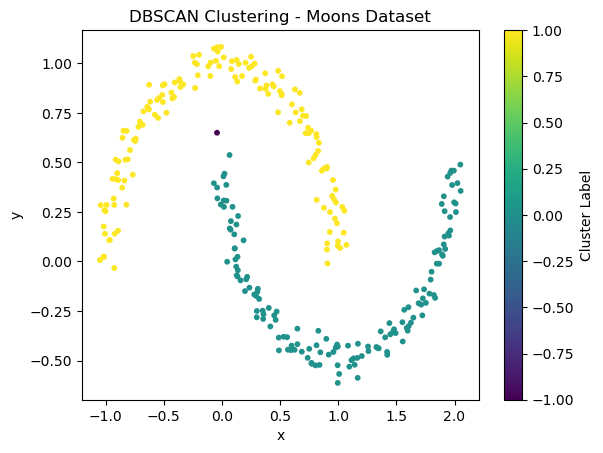

[-1  0]


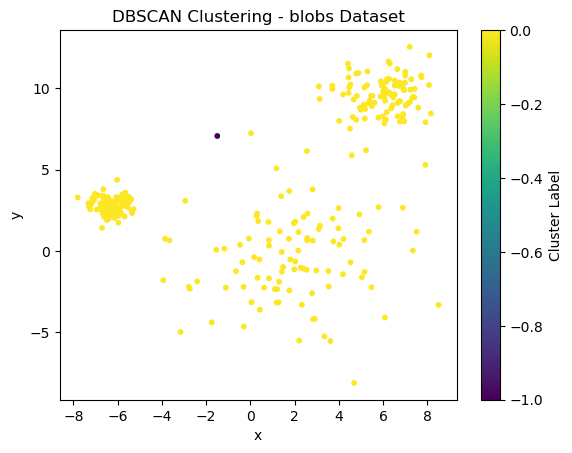

[0 1]


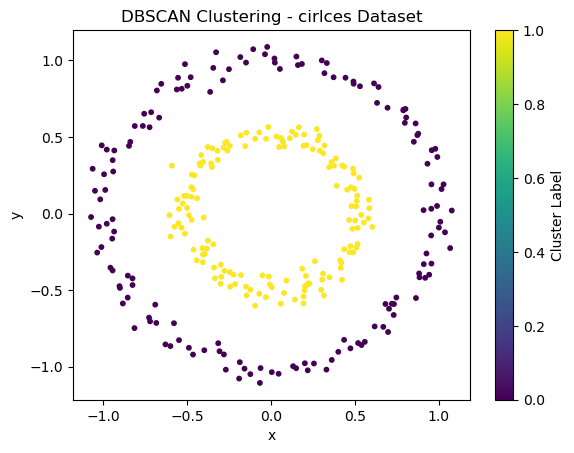

In [16]:
##Using DBSCAN on the Moons dataset##

#eps is the first radius within which we want to examine the number of objects
#min_samples is the minimum number of samples need to be present in the cirlce with the minimum radiusof eps


dbscan_moons = DBSCAN(eps=0.150, min_samples=4)

labels_moons = dbscan_moons.fit_predict(moons_data)  #saves the number of clusters required in labels_moons

print(np.unique(labels_moons)) #returns the unique labels in the dataset

plt.scatter(moons_data["x"], moons_data["y"], c=labels_moons, cmap='viridis', s=10)
plt.title("DBSCAN Clustering - Moons Dataset")  
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label='Cluster Label')
plt.show()


dbscan_blobs = DBSCAN(eps=3, min_samples=7)

labels_blobs = dbscan_blobs.fit_predict(blobs_data)  #saves the number of clusters required in labels_moons

print(np.unique(labels_blobs)) #returns the unique labels in the dataset

plt.scatter(blobs_data["x"], blobs_data["y"], c=labels_blobs, cmap='viridis', s=10)
plt.title("DBSCAN Clustering - blobs Dataset")  
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label='Cluster Label')
plt.show()


dbscan_circles = DBSCAN(eps=0.2, min_samples=4)

labels_circles = dbscan_circles.fit_predict(circles_data)  #saves the number of clusters required in labels_moons

print(np.unique(labels_circles)) #returns the unique labels in the dataset

plt.scatter(circles_data["x"], circles_data["y"], c=labels_circles, cmap='viridis', s=10)
plt.title("DBSCAN Clustering - cirlces Dataset")  
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label='Cluster Label')
plt.show()








Testing eps=0.25, min_samples=1
Testing eps=0.25, min_samples=2
Testing eps=0.25, min_samples=3
Testing eps=0.25, min_samples=4
Testing eps=0.25, min_samples=5
Testing eps=0.25, min_samples=6
Testing eps=0.25, min_samples=7
Testing eps=0.25, min_samples=8
Testing eps=0.25, min_samples=9
Testing eps=0.25, min_samples=10
Testing eps=0.5, min_samples=1
Testing eps=0.5, min_samples=2
Testing eps=0.5, min_samples=3
Testing eps=0.5, min_samples=4
Testing eps=0.5, min_samples=5
Testing eps=0.5, min_samples=6
Testing eps=0.5, min_samples=7
Testing eps=0.5, min_samples=8
Testing eps=0.5, min_samples=9
Testing eps=0.5, min_samples=10
Testing eps=0.75, min_samples=1
Testing eps=0.75, min_samples=2
Testing eps=0.75, min_samples=3
Testing eps=0.75, min_samples=4
Testing eps=0.75, min_samples=5
Testing eps=0.75, min_samples=6
Testing eps=0.75, min_samples=7
Testing eps=0.75, min_samples=8
Testing eps=0.75, min_samples=9
Testing eps=0.75, min_samples=10
Testing eps=1.0, min_samples=1
Testing eps=1.0,

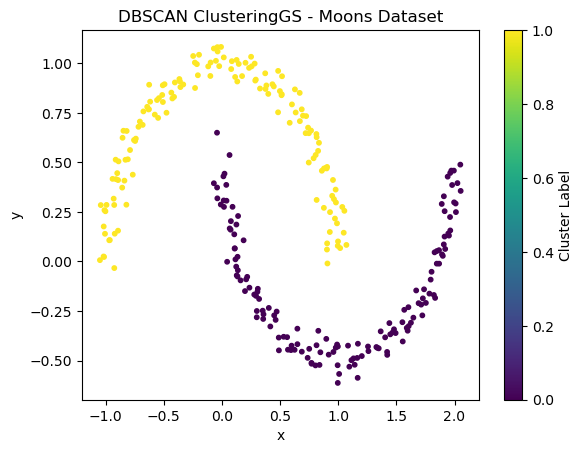

Testing eps=0.25, min_samples=1
Testing eps=0.25, min_samples=2
Testing eps=0.25, min_samples=3
Testing eps=0.25, min_samples=4
Testing eps=0.25, min_samples=5
Testing eps=0.25, min_samples=6
Testing eps=0.25, min_samples=7
Testing eps=0.25, min_samples=8
Testing eps=0.25, min_samples=9
Testing eps=0.25, min_samples=10
Testing eps=0.5, min_samples=1
Testing eps=0.5, min_samples=2
Testing eps=0.5, min_samples=3
Testing eps=0.5, min_samples=4
Testing eps=0.5, min_samples=5
Testing eps=0.5, min_samples=6
Testing eps=0.5, min_samples=7
Testing eps=0.5, min_samples=8
Testing eps=0.5, min_samples=9
Testing eps=0.5, min_samples=10
Testing eps=0.75, min_samples=1
Testing eps=0.75, min_samples=2
Testing eps=0.75, min_samples=3
Testing eps=0.75, min_samples=4
Testing eps=0.75, min_samples=5
Testing eps=0.75, min_samples=6
Testing eps=0.75, min_samples=7
Testing eps=0.75, min_samples=8
Testing eps=0.75, min_samples=9
Testing eps=0.75, min_samples=10
Testing eps=1.0, min_samples=1
Testing eps=1.0,

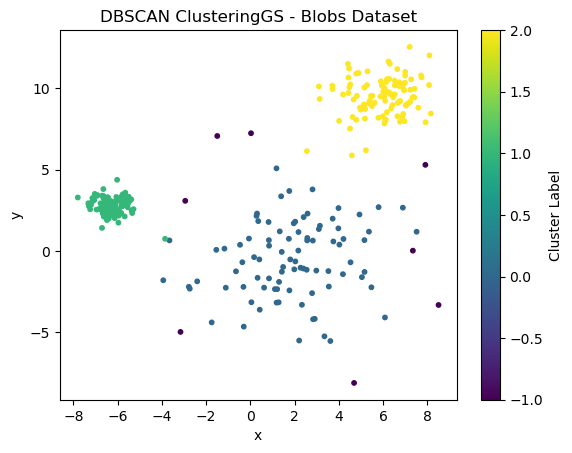

In [17]:
#dbscan_gridsearch for best parameters for eps and min_samples.
import Assignment3_DBSCAN as clusterviz

best_eps, best_min_samples, best_score, best_model = clusterviz.dbscan_gridsearch(moons_data)

print("Best parameters for Moons dataset:")
print(f"eps: {best_eps}, min_samples: {best_min_samples}")

# best_eps_moons = moons_params[1]
# best_min_samples_moons = int(moons_params[2])  # Ensure integer

dbscan_moons = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_moons = dbscan_moons.fit_predict(moons_data)

print(np.unique(labels_moons)) #returns the unique labels in the dataset

plt.scatter(moons_data["x"], moons_data["y"], c=labels_moons, cmap='viridis', s=10)
plt.title("DBSCAN ClusteringGS - Moons Dataset")  
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label='Cluster Label')
plt.show()

# Using the best parameters found by grid search for blobs dataset
best_eps_blobs, best_min_samples_blobs, best_score_blobs, best_model_blobs = clusterviz.dbscan_gridsearch(blobs_data)   
print("Best parameters for Blobs dataset:")
print(f"eps: {best_eps_blobs}, min_samples: {best_min_samples_blobs}")
dbscan_blobs = DBSCAN(eps=best_eps_blobs, min_samples=best_min_samples_blobs)
labels_blobs = dbscan_blobs.fit_predict(blobs_data) 
print(np.unique(labels_blobs))  # returns the unique labels in the dataset

plt.scatter(blobs_data["x"], blobs_data["y"], c=labels_blobs, cmap='viridis', s=10)
plt.title("DBSCAN ClusteringGS - Blobs Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label='Cluster Label')
plt.show()



In [10]:
print(type(moons_params[2]))

<class 'numpy.float64'>
